## Считаем данные и визуализируем дерево:

In [32]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import pydotplus
import pandas as pd
csv = pd.read_csv('german.csv')
classifier = tree.DecisionTreeClassifier(max_depth = 4)
classifier.fit(csv.iloc[:, 1:], csv.iloc[:, :1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

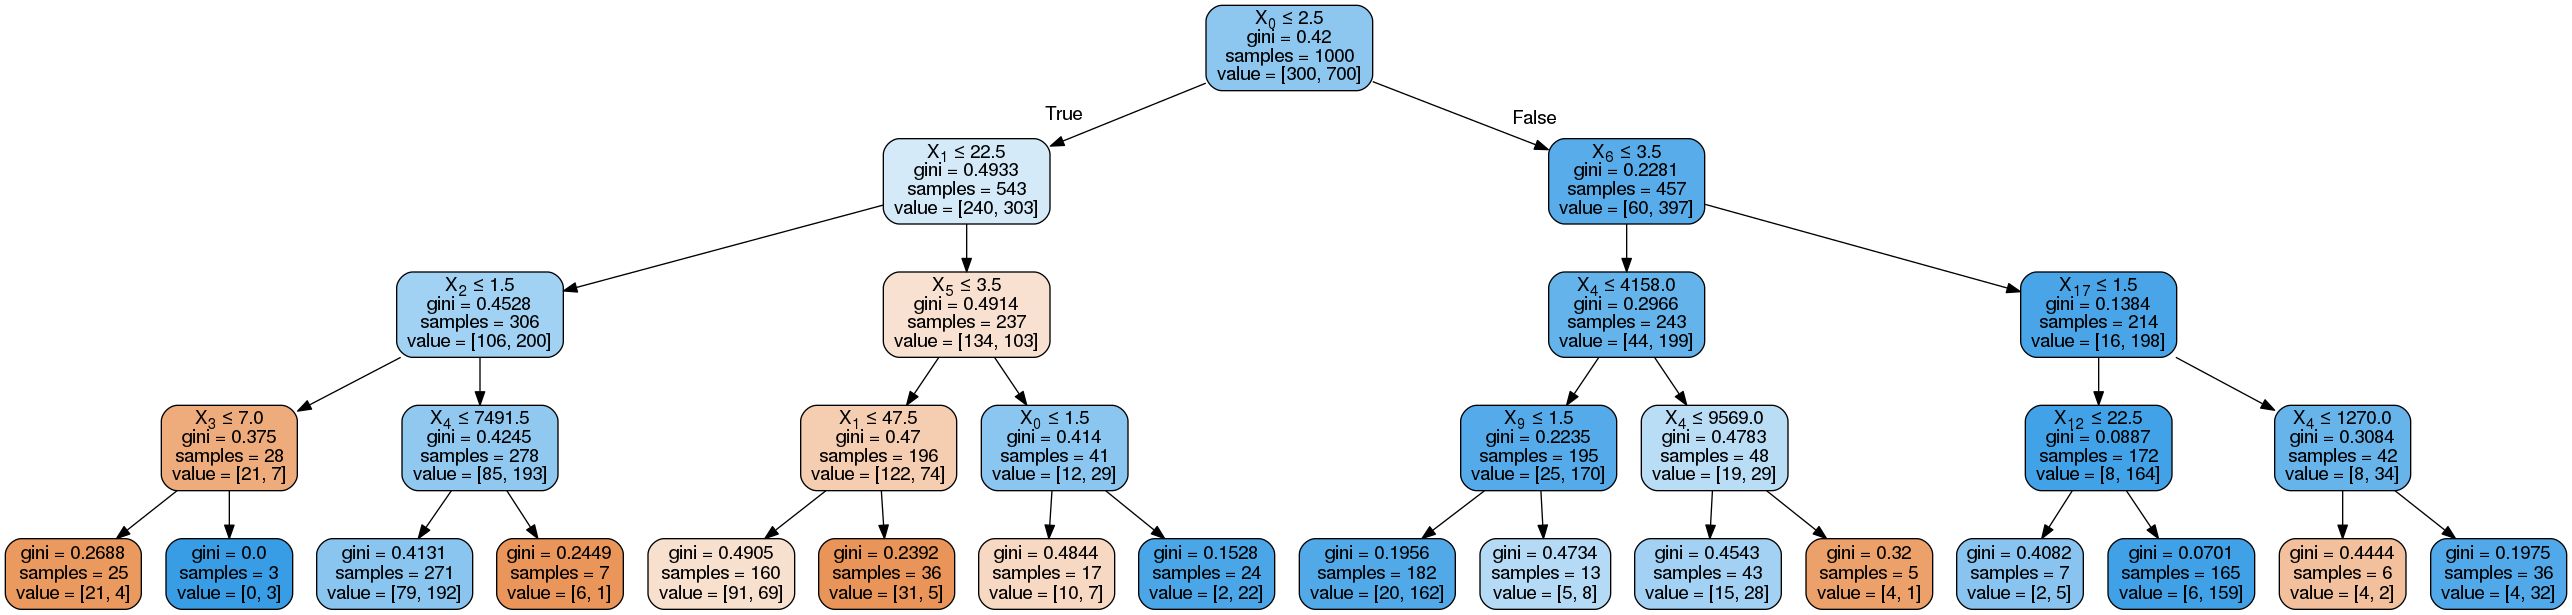

In [33]:
tree.export_graphviz(classifier, out_file = "tree.out", filled = True, rounded = True, special_characters = True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

График на обучающей выборке:

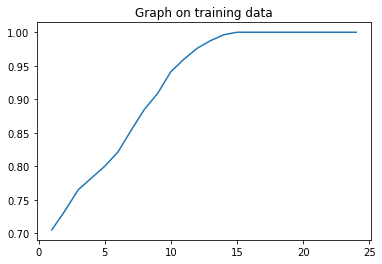

In [34]:
train_data, test_data, train_target, test_target = train_test_split(csv.iloc[:, 1:],  csv.iloc[:, :1],  test_size = 0.2)
precsice = []
for i in range(1, 25, 1):
    classifier = tree.DecisionTreeClassifier(max_depth = i)
    classifier.fit(train_data, train_target)
    train_predictions = classifier.predict(train_data)
    precsice.append(accuracy_score(train_target, train_predictions))
plt.plot(range(1, 25, 1), precsice)
plt.title(u'Graph on training data')
plt.show()

График при помощи кросс-валидации:


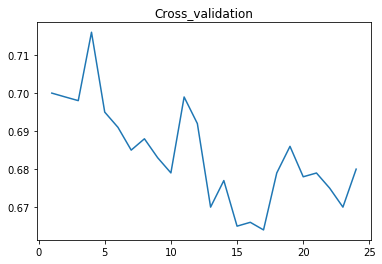

In [29]:
score = []
for i in range(1, 25, 1):
    result = numpy.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth = i), csv.iloc[:, 1:], csv['Creditability']))
    score.append(result)
plt.plot(range(1, 25, 1), cv_score_arr)
plt.title(u'Cross_validation')
plt.show()

В итоге видим что в результате переобучения, с увеличением глубины ухудшается качество работы.
